# 1 . Installing libraries

In [1]:
!pip -q install sep
!pip -q install -U --pre astroquery[all]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.8/994.8 kB 38.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 925.6/925.6 kB 35.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 71.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 81.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 43.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.2/83.2 kB 4.7 MB/s eta 0:00:00


CyMorph library install

In [2]:
!pip -q install ordpy
!pip -q install git+https://github.com/rsautter/Eta
!pip -q install git+https://github.com/rsautter/GPA
!pip -q install scipy
!pip -q install astropy

  Preparing metadata (setup.py) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [3]:
!pip -q install git+https://github.com/rsautter/CyMorph-2DX

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [4]:
import sep
import re
import matplotlib.pyplot as plt
from astropy.io import fits
import pandas as pd
import numpy as np
from astroquery.skyview import SkyView
from astropy import coordinates
from matplotlib.patches import Ellipse

import cymorph

# 2. Galaxy Zoo 2

This presentation analyzes the [Galaxy Zoo 2](https://data.galaxyzoo.org/) dataset.

In [5]:
!gdown 1pyzriDdrEe0e6_6_Ki-F09EjMAcD3Vej

Downloading...
From (original): https://drive.google.com/uc?id=1pyzriDdrEe0e6_6_Ki-F09EjMAcD3Vej
From (redirected): https://drive.google.com/uc?id=1pyzriDdrEe0e6_6_Ki-F09EjMAcD3Vej&confirm=t&uuid=12e2fc9f-c07f-46ea-8f8a-22e9cf7fdba4
To: /content/gz2_hart16.csv.gz
100% 78.5M/78.5M [00:00<00:00, 142MB/s]


In [6]:
!gzip -d gz2_hart16.csv.gz

In [7]:
data = pd.read_csv("gz2_hart16.csv")

In [8]:
data.head()

,dr7objid,ra,dec,rastring,decstring,sample,gz2_class,total_classifications,total_votes,t01_smooth_or_features_a01_smooth_count,...,t11_arms_number_a36_more_than_4_fraction,t11_arms_number_a36_more_than_4_weighted_fraction,t11_arms_number_a36_more_than_4_debiased,t11_arms_number_a36_more_than_4_flag,t11_arms_number_a37_cant_tell_count,t11_arms_number_a37_cant_tell_weight,t11_arms_number_a37_cant_tell_fraction,t11_arms_number_a37_cant_tell_weighted_fraction,t11_arms_number_a37_cant_tell_debiased,t11_arms_number_a37_cant_tell_flag
0,587732591714893851,179.042984,60.522518,11:56:10.32,+60:31:21.1,original,Sc+t,45,342,0,...,0.450,0.450,0.482646,0,16,16.0,0.400,0.400,0.394506,0
1,588009368545984617,135.084396,52.494240,09:00:20.26,+52:29:39.3,original,Sb+t,42,332,1,...,0.512,0.503,0.504833,0,13,13.0,0.317,0.323,0.322743,0
2,587732484359913515,183.371979,50.741508,12:13:29.27,+50:44:29.4,original,Ei,36,125,28,...,0.000,0.000,0.000000,0,0,0.0,0.000,0.000,0.000000,0
3,587741723357282317,186.251953,28.558598,12:25:00.47,+28:33:31.0,original,Sc+t,28,218,1,...,0.240,0.240,0.241322,0,6,6.0,0.240,0.240,0.239765,0
4,587738410866966577,161.086395,14.084465,10:44:20.73,+14:05:04.1,original,Er,43,151,33,...,0.000,0.000,0.000000,0,0,0.0,0.000,0.000,0.000000,0


In [9]:
len(data["gz2_class"].unique())

818

In [10]:
def getSpirals(data):
  sa = data[data["gz2_class"].str.contains("Sa")]
  sb = data[data["gz2_class"].str.contains("Sb")]
  sc = data[data["gz2_class"].str.contains("Sc")]
  sba = data[data["gz2_class"].str.contains("SBa")]
  sbb = data[data["gz2_class"].str.contains("SBb")]
  sbc = data[data["gz2_class"].str.contains("SBc")]
  return sa,sb,sc,sba,sbb,sbc
def getEllipticals(data):
  e = data[data["gz2_class"].str.contains("E")]
  return e
sa,sb,sc,sba,sbb,sbc = getSpirals(data)
e = getEllipticals(data)

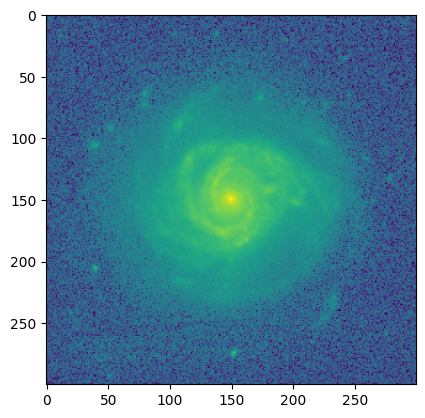

In [11]:
def getImages(ra,dec):
  coords = coordinates.SkyCoord(ra=ra, dec=dec, unit='deg')
  images = SkyView.get_images(position=coords, survey=['SDSSr','SDSSu','SDSSg','SDSSi'])
  return images

data = getImages(179.042984,60.522518)[0][0].data
plt.figure()
plt.imshow(np.log(np.abs(data)))
plt.show()

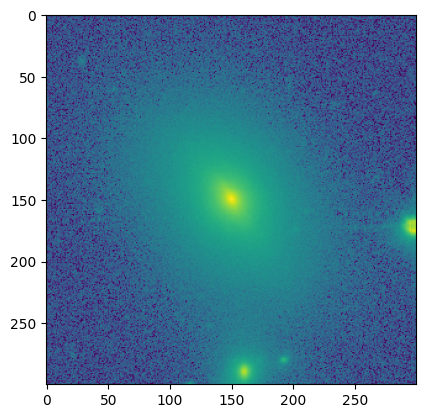

In [12]:

data = getImages(e.iloc[0].ra,e.iloc[0].dec)[0][0].data
plt.figure()
plt.imshow(np.log(np.abs(data)))
plt.show()

# 3. Pre-processing
The following steps are applied to each galaxy image:

1.   Detect objects with sextractor, via sep library
2.   Elliptical Fit
3.   Central object mask creation
4.   Crop image



In [13]:
#data = getImages(179.042984,60.522518)[0][0].data.astype(np.double)
data = getImages(e.iloc[0].ra,e.iloc[0].dec)[0][0].data.astype(np.double)
bkg = sep.Background(data,  bw=64, bh=64, fw=3, fh=3)
objects = sep.extract(data, 1.5, err=bkg.globalrms)

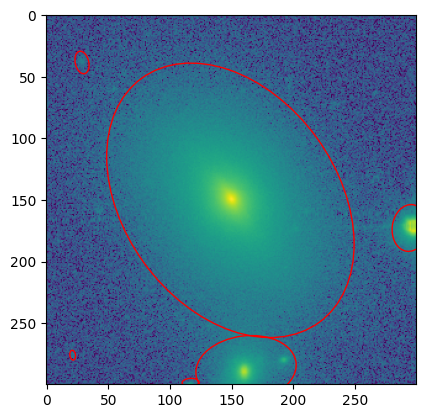

In [14]:
plt.figure()
ax = plt.subplot()
plt.imshow(np.log(np.abs(data)))
for i in range(len(objects)):
  el = Ellipse(xy=(objects['x'][i], objects['y'][i]),
                width=6*objects['a'][i],
                height=6*objects['b'][i],
                angle=objects['theta'][i] * 180. / np.pi)
  el.set_facecolor('none')
  el.set_edgecolor('red')
  ax.add_artist(el)
plt.show()

In [15]:
def findCentralOne(objects,image):
  d = []
  for i in range(len(objects)):
    dx = (image.shape[1]/2-objects['x'][i])
    dy = (image.shape[0]/2-objects['y'][i])
    d.append(dx**2+dy**2)
  return np.argmin(d)
def cutCentral(image):
  bkg = sep.Background(image.astype(np.double),  bw=64, bh=64, fw=3, fh=3)
  objects = sep.extract(image.astype(np.double), 1.5, err=bkg.globalrms)
  i = findCentralOne(objects,image)
  mask = np.zeros(image.shape).astype(bool)
  sep.mask_ellipse(mask,objects['x'][i],objects['y'][i],1.5*objects['a'][i],1.5*objects['b'][i],objects['theta'][i]* 180. / np.pi)
  d1,d2 = np.where(mask)
  return image[np.min(d1):np.max(d1),np.min(d2):np.max(d2)]

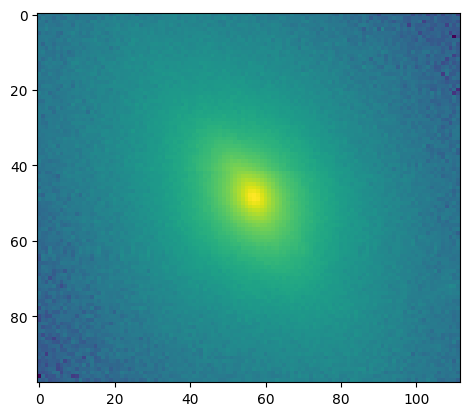

In [16]:
plt.figure()
ax = plt.subplot()
plt.imshow(np.log(np.abs(cutCentral(data))))
plt.show()

# 4. CyMorph

This library includes some metrics that we have previously applied in [Rosa, et al.(2018)](https://academic.oup.com/mnrasl/article/477/1/L101/4961142):
1. Concentration**($c_1$, $c_2$, and $c_n$):Measures the central mass concentration of the galaxy.
2. Asymmetry ($a_2$ and $a_3$): The correlation between the pixels and it's rotated counterpart.
3. Smoothness ($s_2$ and $s_3$): The correlation between the image and it's smoothed pixel counterpart.  
4. GPA ($g_1$, $g_2$, $g_3$ and $g_4$): A set of metrics that are related to the gradient field and its symmetry.

We are incorporating new metrics, from our research team, which now include:
1. [DFA-2D](https://github.com/vanessavcos/DFA-2D) - Bidimensional Detrended Fluctuation Analaysis, from [Souza, et al.(2016)](https://link.springer.com/chapter/10.1007/978-3-030-14070-0_45)
2. [Eta](https://github.com/rsautter/Eta) - A framework that generalizes the entropy metrics from Entropy literature, from [Barauna, et al.(2024)](https://www.mdpi.com/1099-4300/26/6/508)(contain 5 metrics in CyMorph)
3. [$\chi$-Space](https://github.com/rsautter/Chi-Space)** - A set of metrics designed to characterize 1D extreme values, we apply the [Generalized Hilbert Curve](https://github.com/rsautter/gilbert) to apply this set of metrics



** Future Work: The following metrics are planned for integration in future releases.

In [17]:
metricsObj = cymorph.Metrics()

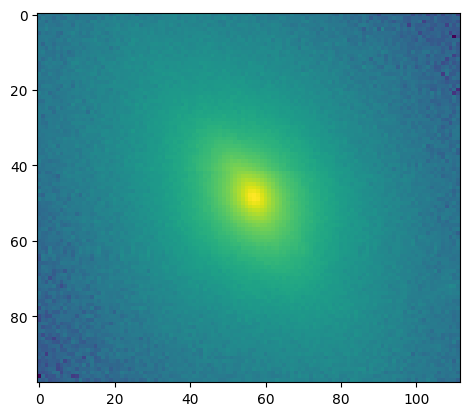

/usr/local/lib/python3.10/dist-packages/eta/entropicForm.py:35: RuntimeWarning: invalid value encountered in log
  alpha,  _ = np.polyfit(np.log(qsi),np.log(ts),deg=1)


{'a2': 0.09444531368164433,
 'a3': 0.3128905110450133,
 's2': 0.9986121222693396,
 's3': 0.9889173558743009,
 'shH': {'Histogram_Shannon': 0.5613604333021862},
 'spH': {'Permutation_Shannon': 0.9921466936532748},
 'spq': {'Permutation_PowerlawTsallis': nan}}

In [18]:
data = getImages(e.iloc[0].ra,e.iloc[0].dec)[0][0].data
img = np.abs(cutCentral(data))
plt.figure()
plt.imshow(np.log(img))
plt.show()
metricsObj(img)

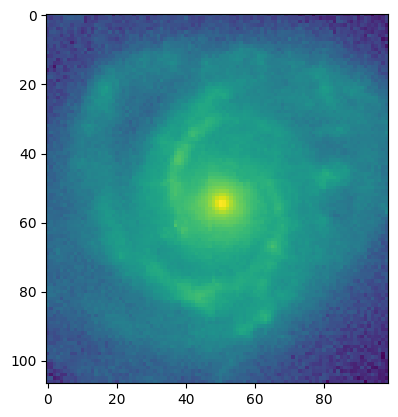

{'a2': 0.16595419449751492,
 'a3': 0.18475591054827578,
 's2': 0.9970610011501464,
 's3': 0.9960316220766783,
 'shH': {'Histogram_Shannon': 0.7073358048541781},
 'spH': {'Permutation_Shannon': 0.9928542589883356},
 'spq': {'Permutation_PowerlawTsallis': nan}}

In [19]:
data = getImages(sc.iloc[0].ra,sc.iloc[0].dec)[0][0].data
img = np.abs(cutCentral(data))
plt.figure()
plt.imshow(np.log(img))
plt.show()
metricsObj(img)

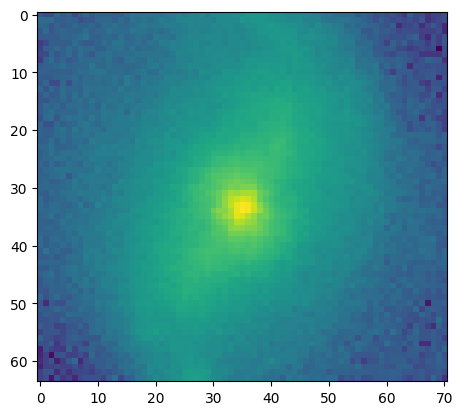

{'a2': 0.2595674325592505,
 'a3': 0.30131082734481596,
 's2': 0.9932767342789326,
 's3': 0.9926854876004495,
 'shH': {'Histogram_Shannon': 0.6002816715804236},
 'spH': {'Permutation_Shannon': 0.9961408235592021},
 'spq': {'Permutation_PowerlawTsallis': nan}}

In [20]:
data = getImages(sbc.iloc[2].ra,sbc.iloc[2].dec)[0][0].data
img = np.abs(cutCentral(data))
plt.figure()
plt.imshow(np.log(img))
plt.show()
metricsObj(img)